# INTRODUCTION

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

### Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
<code>
X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution
y1 Heating Load
y2 Cooling Load
</code>

In [2]:
pip install pandas

     |████████████████████████████████| 10.1 MB 573 kB/s eta 0:00:01
     |████████████████████████████████| 20.1 MB 34 kB/s eta 0:00:013
     |████████████████████████████████| 509 kB 470 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

     |████████████████████████████████| 12.4 MB 1.8 MB/s eta 0:00:01    |████████████████████▋           | 8.0 MB 1.7 MB/s eta 0:00:03
     |████████████████████████████████| 67 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 1.8 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn


     |████████████████████████████████| 215 kB 511 kB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [12]:
pip install xlrd

     |████████████████████████████████| 103 kB 116 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
data = pd.read_excel('ENB2012_data.xlsx')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


**Dimensions of the data**

In [0]:
print('Number of rows in the dataset: ',data.shape[0])
print('Number of columns in the dataset: ',data.shape[1])

Number of rows in the dataset:  768
Number of columns in the dataset:  10


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


**Checking NULL or Missing Values**

In [0]:
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

<font color='green'>There are no null values in the dataset</font>

**Statistical Summary of Data**

In [0]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [0]:
data.median()

X1      0.75
X2    673.75
X3    318.50
X4    183.75
X5      5.25
X6      3.50
X7      0.25
X8      3.00
Y1     18.95
Y2     22.08
dtype: float64

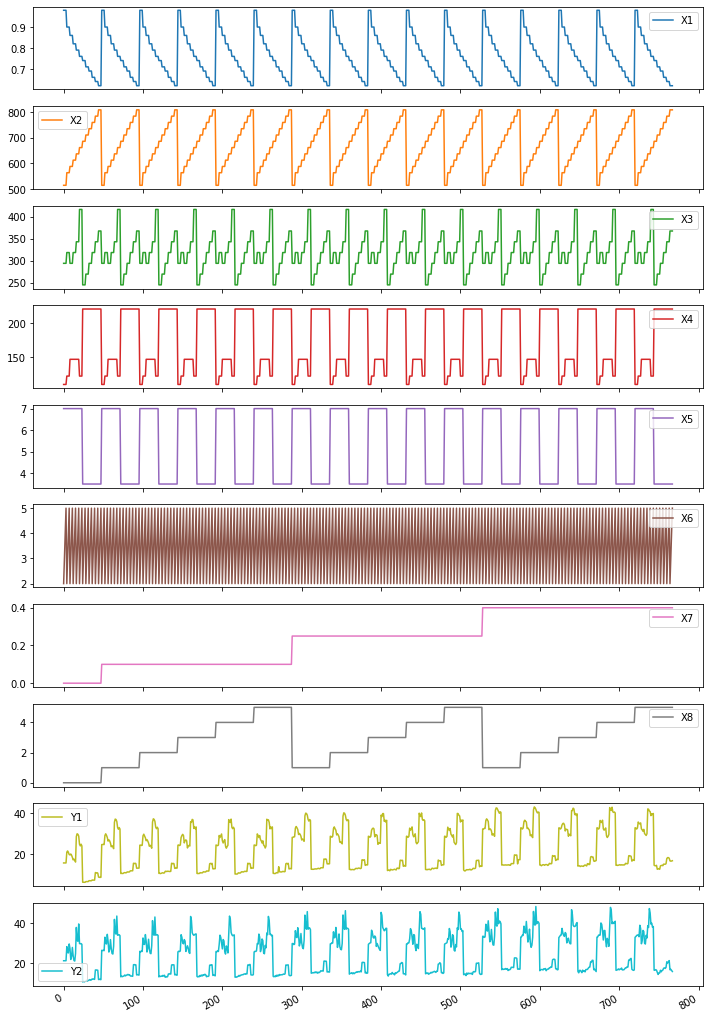

In [0]:
data.plot(kind='line',figsize=(12,20), subplots=True)
plt.show()

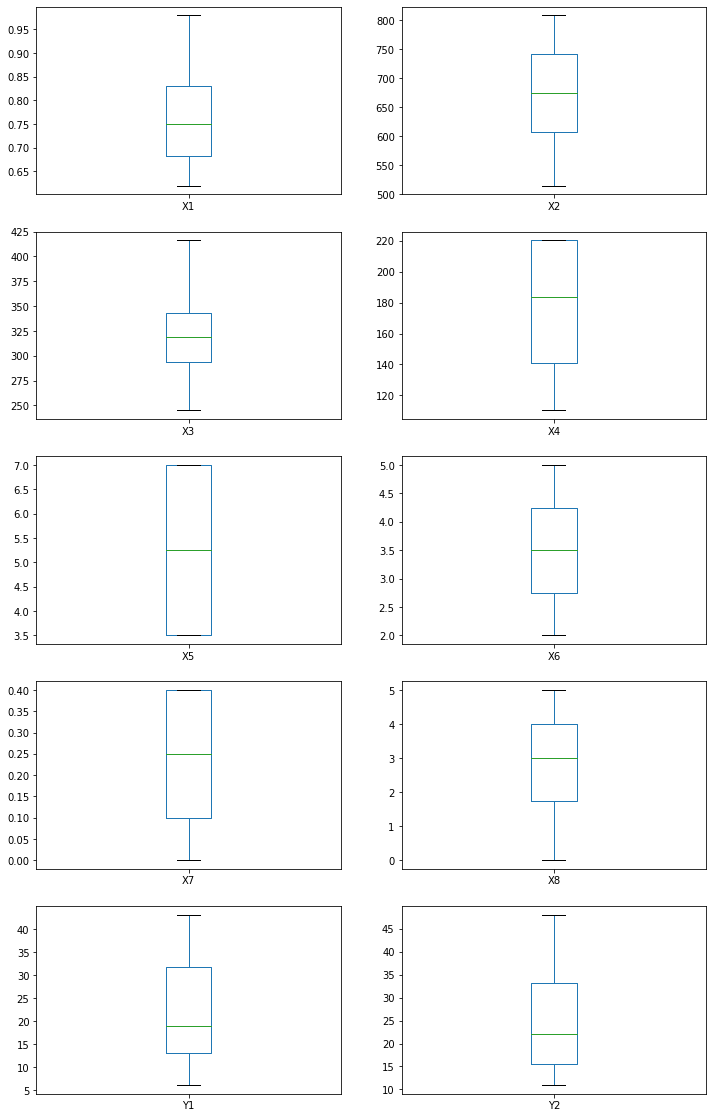

In [0]:
data.plot(kind='box',figsize=(12,20), subplots=True, sharex=False, layout=(5,2))
plt.show()

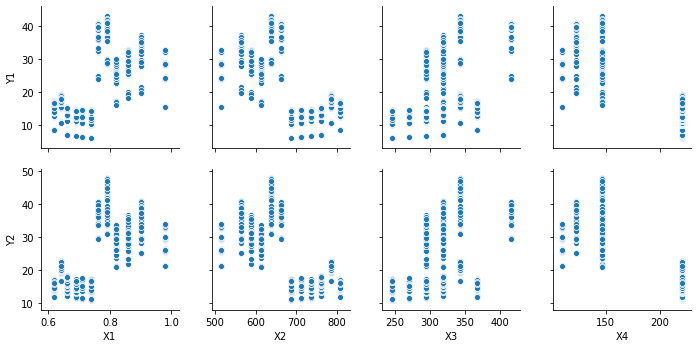

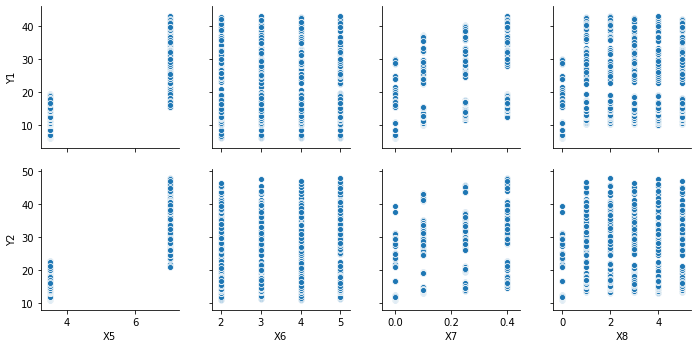

In [0]:
sn.pairplot(data ,x_vars=list(data.columns[:4]), y_vars=list(data.columns[8:]))
sn.pairplot(data ,x_vars=list(data.columns[4:8]), y_vars=list(data.columns[8:]))
plt.show()

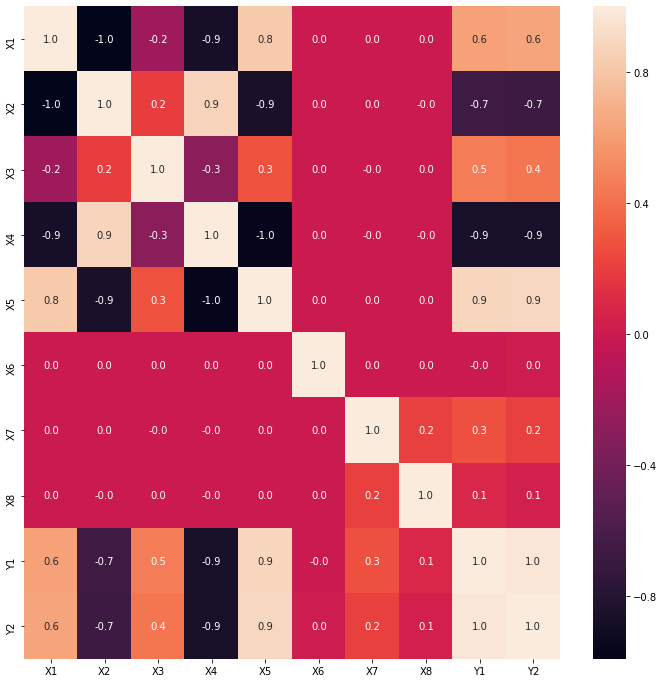

In [0]:
plt.figure(figsize=(12, 12))
sn.heatmap(data.corr(), annot=True, fmt='.1f')
plt.show()

In [0]:
X = data.iloc[:,:-2].values

In [0]:
y = data.iloc[:,-2:].values

**Normalize the data**

In [0]:
X = (X - X.min())/(X.max()-X.min())
X[:5]

array([[0.00121212, 0.63636364, 0.36363636, 0.13636364, 0.00865801,
        0.00247372, 0.        , 0.        ],
       [0.00121212, 0.63636364, 0.36363636, 0.13636364, 0.00865801,
        0.00371058, 0.        , 0.        ],
       [0.00121212, 0.63636364, 0.36363636, 0.13636364, 0.00865801,
        0.00494743, 0.        , 0.        ],
       [0.00121212, 0.63636364, 0.36363636, 0.13636364, 0.00865801,
        0.00618429, 0.        , 0.        ],
       [0.00111317, 0.6969697 , 0.39393939, 0.15151515, 0.00865801,
        0.00247372, 0.        , 0.        ]])

# Train the Models

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, GridSearchCV, train_test_split

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor


**We will split our data. 80% of our data will be train data and 20% of it will be test data.**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size= 0.2)
print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)

Shape of X_train :  (614, 8)
Shape of y_train :  (614, 2)


In [0]:
kf = KFold(n_splits=5, shuffle=True)

def result(estimator):
    score = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        estimator.fit(X_train, y_train)
        score.append(estimator.score(X_test, y_test))
    return sum(score)/len(score)

def error(actual, predicted):
    return {'Mean Absolute Error':mean_absolute_error(actual, predicted),
            "Mean Squard Error":mean_squared_error(actual, predicted),
           "R2 Score on whole Data":r2_score(actual, predicted)}
    

### Linear Regression

In [0]:
lr = LinearRegression()
print("Average R2 score : ", result(lr))
for fun, val in error(y, lr.predict(X)).items():
    print(fun, val)

Average R2 score :  0.8979528297823789
Mean Absolute Error 2.1471747603646025
Mean Squard Error 9.350353497674767
R2 Score on whole Data 0.9018017297208981


### Random Forest Regression

In [0]:
rfr_mae = RandomForestRegressor(criterion='mae')
model = GridSearchCV(rfr_mae,{'n_estimators':range(1,20)},cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_estimators': 18}

In [0]:
rfr_mse = RandomForestRegressor(criterion='mse')
model = GridSearchCV(rfr_mse,{'n_estimators':range(1,20)},cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_estimators': 17}

In [0]:
rfr_mse = RandomForestRegressor(n_estimators=17, criterion='mse')
rfr_mae = RandomForestRegressor(n_estimators=18, criterion='mae')
print("Average R2 score mse : ", result(rfr_mse))

for fun, val in error(y, rfr_mse.predict(X)).items():
    print(fun, val)

print("Average R2 score MAE : ", result(rfr_mae))
for fun, val in error(y, rfr_mae.predict(X)).items():
    print(fun, val)

Average R2 score mse :  0.9809078048298495
Mean Absolute Error 0.37560393688725496
Mean Squard Error 0.6165157955323673
R2 Score on whole Data 0.9932281417061353
Average R2 score MAE :  0.9788082021164378
Mean Absolute Error 0.413337928921568
Mean Squard Error 0.7734386838145186
R2 Score on whole Data 0.9915158785202567


In [0]:
rf_score_mse = []
rf_score_mae = []
for i in range(1, 50):
    rfr_mse = RandomForestRegressor(n_estimators=i, criterion='mse')
    rfr_mae = RandomForestRegressor(n_estimators=i, criterion='mae')
    rf_score_mae.append(result(rfr_mse))
    rf_score_mse.append(result(rfr_mae))

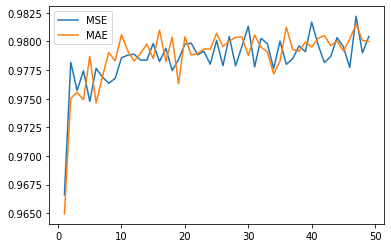

In [0]:
x_val = np.arange(1,50)
plt.plot(x_val , rf_score_mae, x_val, rf_score_mse)
plt.legend(labels = ["MSE","MAE"])

### KNeighborsClassifier

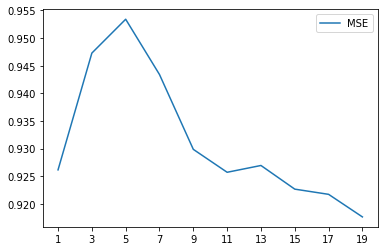

In [0]:
knr_score = []
for i in range(1, 20, 2):
    knr = MultiOutputRegressor(KNeighborsRegressor(n_neighbors= i))
    knr_score.append(result(knr))
    
x_val = np.arange(1,20,2)
plt.plot(x_val , knr_score)
plt.xticks(x_val)
plt.show()

In [0]:
knr = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=5))
print("Average R2 score : ", result(knr))
for fun, val in error(y, knr.predict(X)).items():
    print(fun, val)

Average R2 score :  0.9516093611073915
Mean Absolute Error 1.2817239583333333
Mean Squard Error 3.246349682291667
R2 Score on whole Data 0.9663346922924427


### Support Vector

In [0]:
svr = MultiOutputRegressor(SVR(kernel='linear'))
print("Average R2 score : ", result(svr))
for fun, val in error(y, svr.predict(X)).items():
    print(fun, val)

Average R2 score :  0.4957112184449423
Mean Absolute Error 5.493297580155554
Mean Squard Error 48.24824677596935
R2 Score on whole Data 0.49785083406030084
